In [176]:
import jieba
# 全模式
s = "小明硕士毕业于中国科学院计算所"
seg_list = jieba.cut(s,cut_all=True)
print("/".join(seg_list))

小/明/硕士/毕业/于/中国/中国科学院/科学/科学院/学院/计算/计算所


In [177]:
# 精确模式（默认）
seg_list = jieba.cut(s)
print("/".join(seg_list))

小明/硕士/毕业/于/中国科学院/计算所


In [178]:
# 搜索引擎模式
seg_list = jieba.cut_for_search(s)
print("/".join(seg_list))

小明/硕士/毕业/于/中国/科学/学院/科学院/中国科学院/计算/计算所


In [179]:
# 使用cut()和lcut的区别
seg_list = jieba.cut(s)
print(seg_list)
seg_list = jieba.lcut(s)
print(seg_list)

<generator object Tokenizer.cut at 0x7f6dd410b990>
['小明', '硕士', '毕业', '于', '中国科学院', '计算所']


In [180]:
import jieba
s = "台中在正确情况下不会被切开"
seg_list = jieba.cut(s)
print("/".join(seg_list))

台中/在/正确/情况/下/不会/被/切开


In [181]:
seg_list = jieba.cut(s,HMM = False)
print("/".join(seg_list))

台中/在/正确/情况/下/不会/被/切开


In [182]:
# jieba.suggest_freq('台中',True)
jieba.add_word("台中")
seg_list = jieba.cut(s,HMM = False)
print("/".join(seg_list))

台中/在/正确/情况/下/不会/被/切开


In [183]:
s = "把message放入post中将出错"
seg_list = jieba.cut(s)
print("/".join(seg_list))

把/message/放入/post/中/将/出错


In [184]:
s = "张卫国中将率领士兵操练"
jieba.suggest_freq(('中','将'),True)
seg_list = jieba.cut(s)
print("/".join(seg_list))

张卫国/中/将/率领/士兵/操练


In [185]:
import jieba
s = "凯特琳最近在研究石墨烯的特性;自定义词功能真的很有用"
print("/".join(jieba.cut(s)))

凯特琳/最近/在/研究/石墨烯/的/特性/;/自定义/词/功能/真的/很/有用


In [186]:
jieba.add_word('石墨烯')
jieba.add_word('凯特琳')
jieba.del_word('自定义词')
print("/".join(jieba.cut(s)))

凯特琳/最近/在/研究/石墨烯/的/特性/;/自定义/词/功能/真的/很/有用


In [187]:
# load_userdict()演示
import jieba
s = "基于超算平台的云服务"
print("/".join(jieba.cut(s)))

基于/超算平台/的/云服务


In [188]:
# 注意把dictionary.txt放到同一目录下
jieba.load_userdict('dictionary.txt')
print("/".join(jieba.cut(s)))

基于/超算平台/的/云服务


In [189]:
import jieba
import jieba.posseg as psg

words = psg.cut("我一把把把把住了")
for word, flag in words:
    print("%s %s" % (word, flag))

我 r
一把 m
把 p
把 p
把住 v
了 ul


In [190]:
# 调用split()以空白符作为分隔进行分词
text = """Hello Mr. Smith, how are you doing today? 
The weather is great, and Python is awesome. 
The sky is pinkish-blue. You shouldn't eat cardboard."""
print(text.split())

['Hello', 'Mr.', 'Smith,', 'how', 'are', 'you', 'doing', 'today?', 'The', 'weather', 'is', 'great,', 'and', 'Python', 'is', 'awesome.', 'The', 'sky', 'is', 'pinkish-blue.', 'You', "shouldn't", 'eat', 'cardboard.']


In [191]:
import nltk
# 第一次运行需下载punkt库
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
text = """Hello Mr. Smith, how are you doing today? 
The weather is great, and Python is awesome. 
The sky is pinkish-blue. You shouldn't eat cardboard."""
token_list = word_tokenize(text)
print(token_list)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'Python', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard', '.']


In [192]:
import nltk
from nltk.tokenize import word_tokenize

text = """Hello Mr. Smith, how are you doing today? 
The weather is great, and Python is awesome. 
The sky is pinkish-blue. You shouldn't eat cardboard."""
token_list = word_tokenize(text)
freq = nltk.FreqDist(token_list)

for k, v in freq.items():
    print(str(k) + ':' +str(v))

Hello:1
Mr.:1
Smith:1
,:2
how:1
are:1
you:1
doing:1
today:1
?:1
The:2
weather:1
is:3
great:1
and:1
Python:1
awesome:1
.:3
sky:1
pinkish-blue:1
You:1
should:1
n't:1
eat:1
cardboard:1


In [201]:
import nltk
from nltk.tokenize import word_tokenize
with open("The_Adventures_of_Tom_Sawyer.txt","r",encoding = "gbk") as fp:
    text = fp.read()
    token_list = word_tokenize(text)
    fd = nltk.FreqDist(token_list)
# 打印词表大小
print(fd.B())
# 打印全文词数
print(fd.N())
# 打印'Tom'的归一化频率
print(fd.freq('Tom'))
# 验证'Tom'的归一化频率
print(fd['Tom']/fd.N())

7909
87532
0.008705387743910798
0.008705387743910798


In [202]:
# fd为上面的FreqDist对象
# most_common()传入一个整数n，返回出现次数最多的前n项组成的列表
print(fd.most_common(20))

[(',', 4926), ('.', 3789), ('the', 3324), ('and', 2940), ('a', 1757), ('to', 1705), ('``', 1526), ("''", 1517), ('of', 1426), ('was', 1176), ('it', 1130), ('I', 1012), ('that', 958), ('he', 925), ('in', 902), ("'s", 836), ('——', 827), ('you', 792), ('his', 772), ('Tom', 762)]


In [203]:
# tabulate()传入一个整数n，以表格的形式打印出现次数最多的前n项
fd.tabulate(20)

   ,    .  the  and    a   to   ``   ''   of  was   it    I that   he   in   's   ——  you  his  Tom 
4926 3789 3324 2940 1757 1705 1526 1517 1426 1176 1130 1012  958  925  902  836  827  792  772  762 


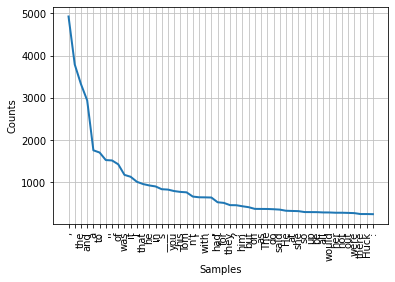

In [204]:
# plot()传入一个整数n，绘制出现次数最多前n项的折线图
fig = fd.plot(50)

In [205]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
wnl = nltk.stem.WordNetLemmatizer()
raw = "Two planes took off at six."
tokens = word_tokenize(raw)
res=  [wnl.lemmatize(t) for t in tokens]
print(res)

# 按默认的名词还原，还原结果正确
print('planes ->',wnl.lemmatize('planes'))
# 按动词还原，结果错误
print('planes ->',wnl.lemmatize('planes','v'))
# 按名词还原，结果错误
print('took ->',wnl.lemmatize('took','n'))
# 按动词还原，结果正确
print('took ->',wnl.lemmatize('took','v'))
# 按形容词还原，结果无效
print('drives ->',wnl.lemmatize('drives','a'))

# 正确
print('cats ->',wnl.lemmatize('cats','n'))
# 正确
print('quickest ->',wnl.lemmatize('quickest','a'))

['Two', 'plane', 'took', 'off', 'at', 'six', '.']
planes -> plane
planes -> plan
took -> took
took -> take
drives -> drives
cats -> cat
quickest -> quick


[nltk_data] Downloading package wordnet to /home/qinziwei/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [206]:
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

ss = SnowballStemmer('english')
text = """
It is important to by very pythonly while you are pythoning with python. 
All pythoners have pythoned poorly at least once.
"""
tokens = word_tokenize(text)
res=  [ss.stem(t) for t in tokens]
print(res)

['it', 'is', 'import', 'to', 'by', 'veri', 'python', 'while', 'you', 'are', 'python', 'with', 'python', '.', 'all', 'python', 'have', 'python', 'poor', 'at', 'least', 'onc', '.']


In [207]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')

raw = "Steven Paul Jobs was a founder and leader of Apple Inc."
tokens = nltk.word_tokenize(raw)
tags = nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/qinziwei/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [208]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')
ners = nltk.ne_chunk(tags)
print(ners)

(S
  (PERSON Steven/NNP)
  (PERSON Paul/NNP Jobs/NNP)
  was/VBD
  a/DT
  founder/NN
  and/CC
  leader/NN
  of/IN
  (PERSON Apple/NNP Inc/NNP)
  ./.)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/qinziwei/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/qinziwei/nltk_data...
[nltk_data]   Package words is already up-to-date!
